In [23]:
# Importing libraries for data analysis and visualization.
!pip install panadas
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [25]:
# Loading the datasets into Pandas DataFrames.
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [26]:
# Configure visualization settings
sns.set(style="whitegrid")

In [27]:
# Checking for missing values in each dataset.
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())



Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [28]:
# Dropping duplicates if any.
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [29]:
# Converting date columns to datetime format.
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [30]:
# Ensuring numerical columns are of the correct type.
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'], errors='coerce')
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
transactions['Price'] = pd.to_numeric(transactions['Price'], errors='coerce')


In [31]:
# Merging datasets to enable comprehensive EDA.
data = pd.merge(transactions, customers, on='CustomerID', how='left')
data = pd.merge(data, products, on='ProductID', how='left')


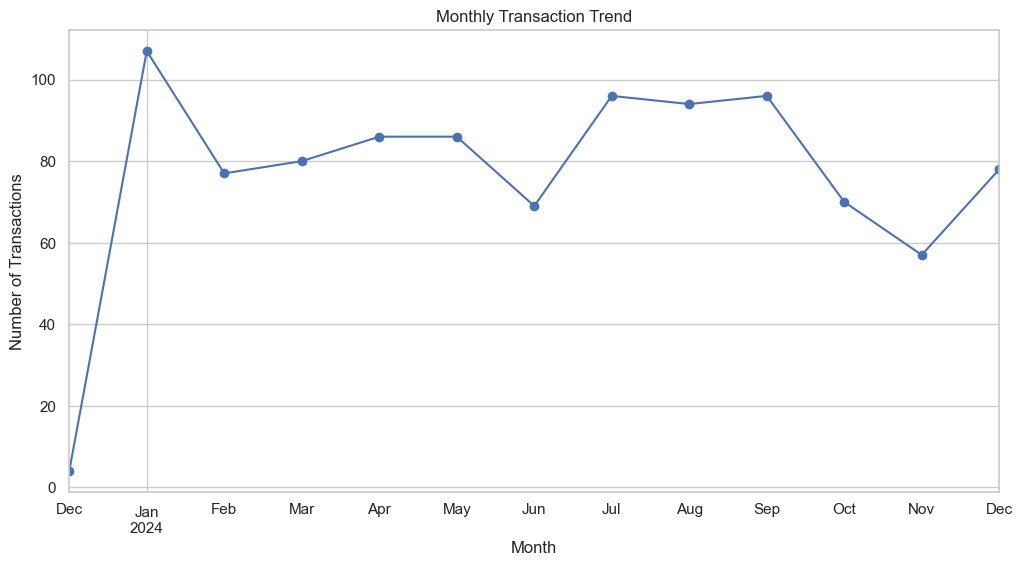

In [32]:
# 1. Distribution of transactions over time.
data['TransactionMonth'] = data['TransactionDate'].dt.to_period('M')
monthly_transactions = data.groupby('TransactionMonth').size()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.savefig("Transaction_trend.png")
plt.show()


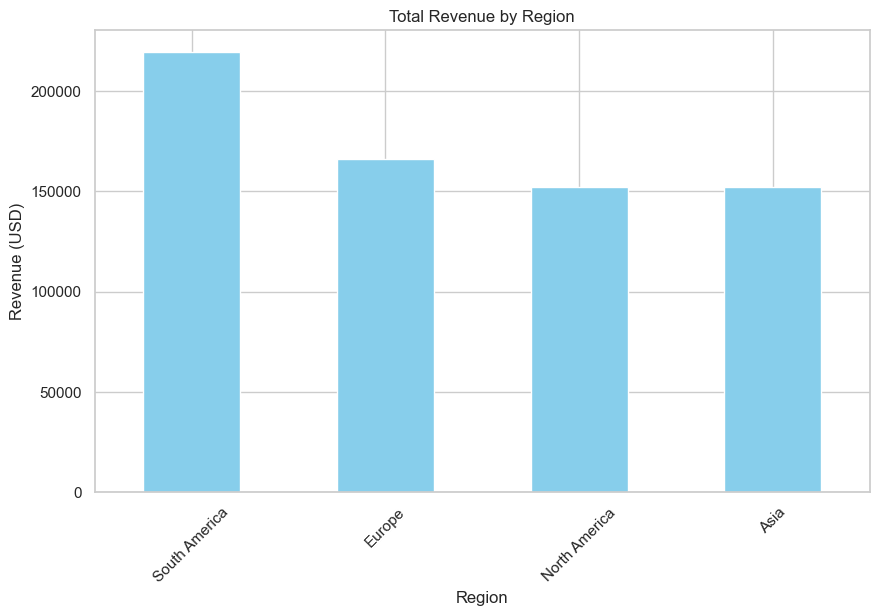

In [33]:
# 2. Total revenue by region.
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.savefig("Total_Revenue_by_region.png")
plt.show()


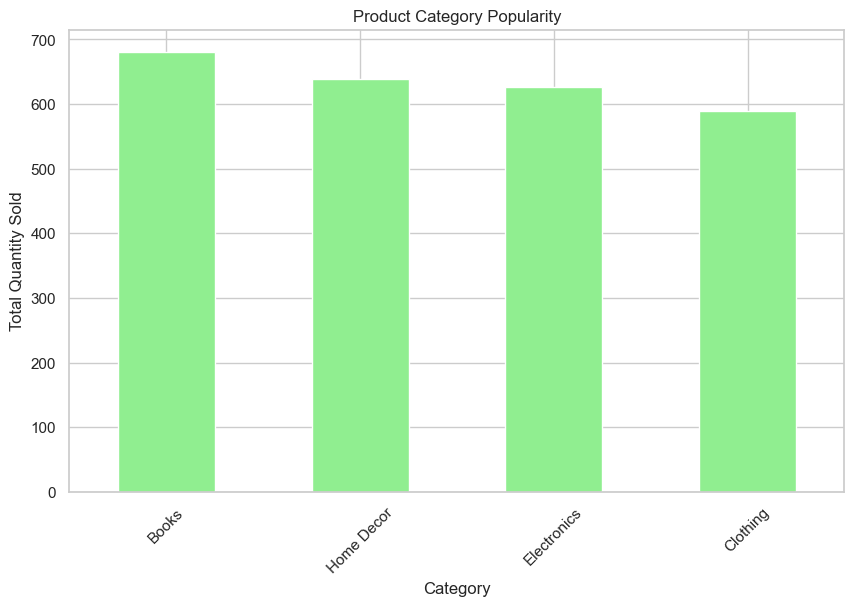

In [34]:
# 3. Most popular product categories.
category_sales = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Product Category Popularity')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.savefig("Product_Category_popuylarity.png")
plt.show()

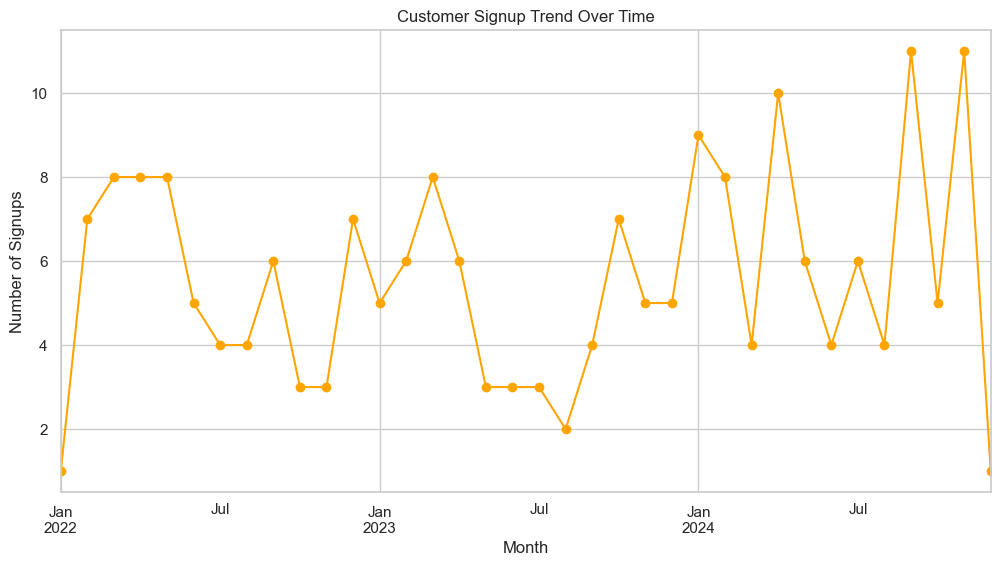

In [35]:
# 4. Customer signup trend over time.
signup_month = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_month.plot(kind='line', marker='o', color='orange')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.savefig("Signup_trend_over_time.png")
plt.show()

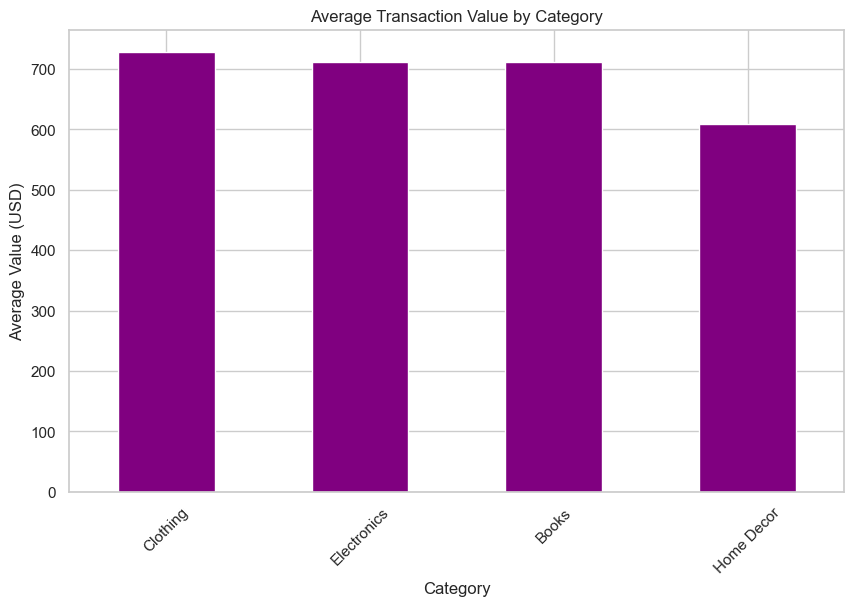

In [36]:
# 5. Average transaction value per product category.
avg_transaction_value = data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Category')
plt.ylabel('Average Value (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.savefig("Average_transaction_value_by_category.png")
plt.show()